In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
val = ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory("C:/Users/Moi/Desktop/dataset/train",
                                          target_size=(150,150),
                                          batch_size = 32)
                                         
test_dataset = test.flow_from_directory("C:/Users/Moi/Desktop/dataset/test",
                                          target_size=(150,150),
                                          batch_size =32)
val_dataset = val.flow_from_directory("C:/Users/Moi/Desktop/dataset/validation",
                                          target_size=(150,150),
                                          batch_size = 32)
#ImageCleaner(ds, idxs, path)

Found 50487 images belonging to 5 classes.
Found 5172 images belonging to 5 classes.
Found 5040 images belonging to 5 classes.


In [3]:
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 200x200 with 3 bytes color
# This is the first convolution
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
# The second convolution
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The third convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The fourth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# # The fifth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
# Only 1 output neuron. 
tf.keras.layers.Dense(5, activation='softmax')])


In [4]:
model.compile( optimizer=tf.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.AUC()])

In [5]:
#steps_per_epoch = train_imagesize/batch_size

history = model.fit(train_dataset,
      steps_per_epoch=40,  
      epochs=25,
      verbose=1,
      validation_data = val_dataset,
      validation_steps=8)

Epoch 1/25
40/40 [==============================] - 26s 611ms/step - loss: 1.5645 - accuracy: 0.2745 - auc: 0.5886 - val_loss: 1.3181 - val_accuracy: 0.4375 - val_auc: 0.7842
Epoch 2/25
40/40 [==============================] - 24s 588ms/step - loss: 1.3112 - accuracy: 0.4682 - auc: 0.7830 - val_loss: 1.1740 - val_accuracy: 0.4531 - val_auc: 0.8172
Epoch 3/25
40/40 [==============================] - 23s 584ms/step - loss: 0.9762 - accuracy: 0.5834 - auc: 0.8770 - val_loss: 0.8066 - val_accuracy: 0.6836 - val_auc: 0.9201
Epoch 4/25
40/40 [==============================] - 24s 592ms/step - loss: 0.8152 - accuracy: 0.6934 - auc: 0.9153 - val_loss: 0.9669 - val_accuracy: 0.5977 - val_auc: 0.8879
Epoch 5/25
40/40 [==============================] - 26s 662ms/step - loss: 0.7983 - accuracy: 0.6887 - auc: 0.9198 - val_loss: 0.5608 - val_accuracy: 0.8242 - val_auc: 0.9642
Epoch 6/25
40/40 [==============================] - 24s 596ms/step - loss: 0.6312 - accuracy: 0.7779 - auc: 0.9495 - val_loss

In [6]:
model.evaluate(test_dataset)


162/162 [==============================] - 35s 214ms/step - loss: 0.4430 - accuracy: 0.8693 - auc: 0.9736 16s - loss: 0.4405 - accuracy:  - ETA: 4s - loss: 0.4412 - accuracy: 0.8690 - auc: 0. - ETA: 4s - loss:


[0.44303593039512634, 0.8692961931228638, 0.9736018180847168]

In [7]:
STEP_SIZE_TEST=test_dataset.n//test_dataset.batch_size
test_dataset.reset()
preds = model.predict(test_dataset,
                      verbose=1)

162/162 [==============================] - 29s 175ms/step


In [8]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

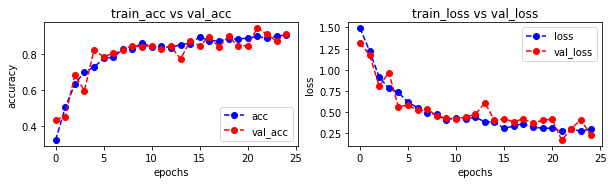

In [9]:
plot_accuracy_loss(history)


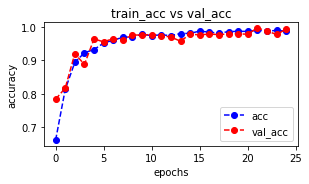

In [10]:
def plot_auc(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['auc'],'bo--', label = "acc")
    plt.plot(history.history['val_auc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
plot_auc(history)

In [11]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
roc_auc_score(test_dataset.classes, preds,multi_class='ovr')

0.4996741900600504

[[1. 0. 0. 0. 0.]]


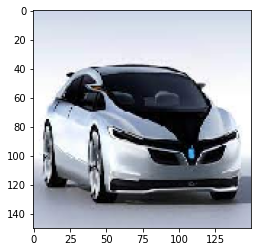

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

img1 = image.load_img("C:/Users/Moi/Desktop/car.jpg",target_size=(150,150))
plt.imshow(img1)
Y = image.img_to_array(img1)
    
X = np.expand_dims(Y,axis=0)
val = model.predict(X)
print(val)

[[0. 1. 0. 0. 0.]]


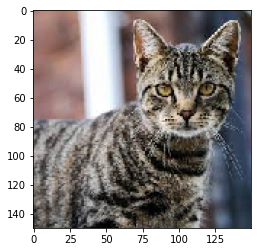

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

img1 = image.load_img("C:/Users/Moi/Desktop/cat.jpg",target_size=(150,150))
plt.imshow(img1)
Y = image.img_to_array(img1)
    
X = np.expand_dims(Y,axis=0)
val = model.predict(X)
print(val)

[[0. 0. 0. 1. 0.]]


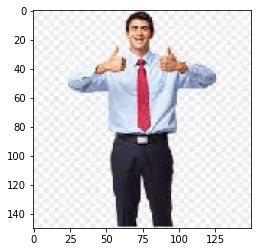

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

img1 = image.load_img("C:/Users/Moi/Desktop/person.jpg",target_size=(150,150))
plt.imshow(img1)
Y = image.img_to_array(img1)
    
X = np.expand_dims(Y,axis=0)
val = model.predict(X)
print(val)

[[1. 0. 0. 0. 0.]]


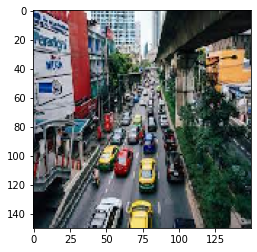

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

img1 = image.load_img("C:/Users/Moi/Desktop/road.jpg",target_size=(150,150))
plt.imshow(img1)
Y = image.img_to_array(img1)
    
X = np.expand_dims(Y,axis=0)
val = model.predict(X)
print(val)

[[0. 0. 0. 0. 1.]]


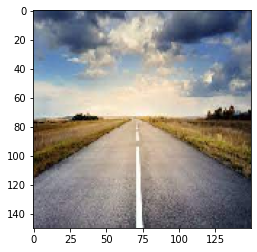

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

img1 = image.load_img("C:/Users/Moi/Desktop/empty.jpg",target_size=(150,150))
plt.imshow(img1)
Y = image.img_to_array(img1)
    
X = np.expand_dims(Y,axis=0)
val = model.predict(X)
print(val)

In [17]:
from imageai.Detection import ObjectDetection
import os

execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath( os.path.join(execution_path , "resnet50_coco_best_v2.1.0.h5"))
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , "C:/Users/Moi/Desktop/images.jpg"), output_image_path=os.path.join(execution_path , "C:/Users/Moi/Desktop/imagenew.jpg"))

for eachObject in detections:
    print(eachObject["name"] , " : " , eachObject["percentage_probability"] )

car  :  55.11577129364014


In [18]:
detections, extracted_images = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , "C:/Users/Moi/Desktop/images.jpg"), output_image_path=os.path.join(execution_path , "C:/Users/Moi/Desktop/imagenew.jpg"), extract_detected_objects=True)
